<a href="https://colab.research.google.com/github/Dimildizio/VehicleClassifier/blob/main/transfer_learning/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from IPython.display import display, Image, clear_output

In [11]:
!pip install roboflow
!pip install ultralytics
clear_output()

In [14]:
import cv2
import glob
import os
import ultralytics
from IPython import display
from roboflow import Roboflow
from ultralytics import YOLO

In [3]:
HOME = os.getcwd()

print(HOME)

/content


In [4]:
ultralytics.checks()

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [5]:
API = ''
rf = Roboflow(api_key=API)
project = rf.workspace("dimildizio-qri0w").project("vehicle-detection-evz2s")
dataset = project.version(1).download("yolov8")
clear_output()

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.112, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Vehicle-detection-1 in yolov8:: 100%|██████████| 232/232 [00:00<00:00, 2228.42it/s]


In [6]:
%cd {HOME}
! yolo task=detect mode=train model = yolov8s.pt data = {dataset.location}/data.yaml epochs = 10 imgsz=640

clear_output()

/content
100% 21.5M/21.5M [00:01<00:00, 20.7MB/s]
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Vehicle-detection-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

/content


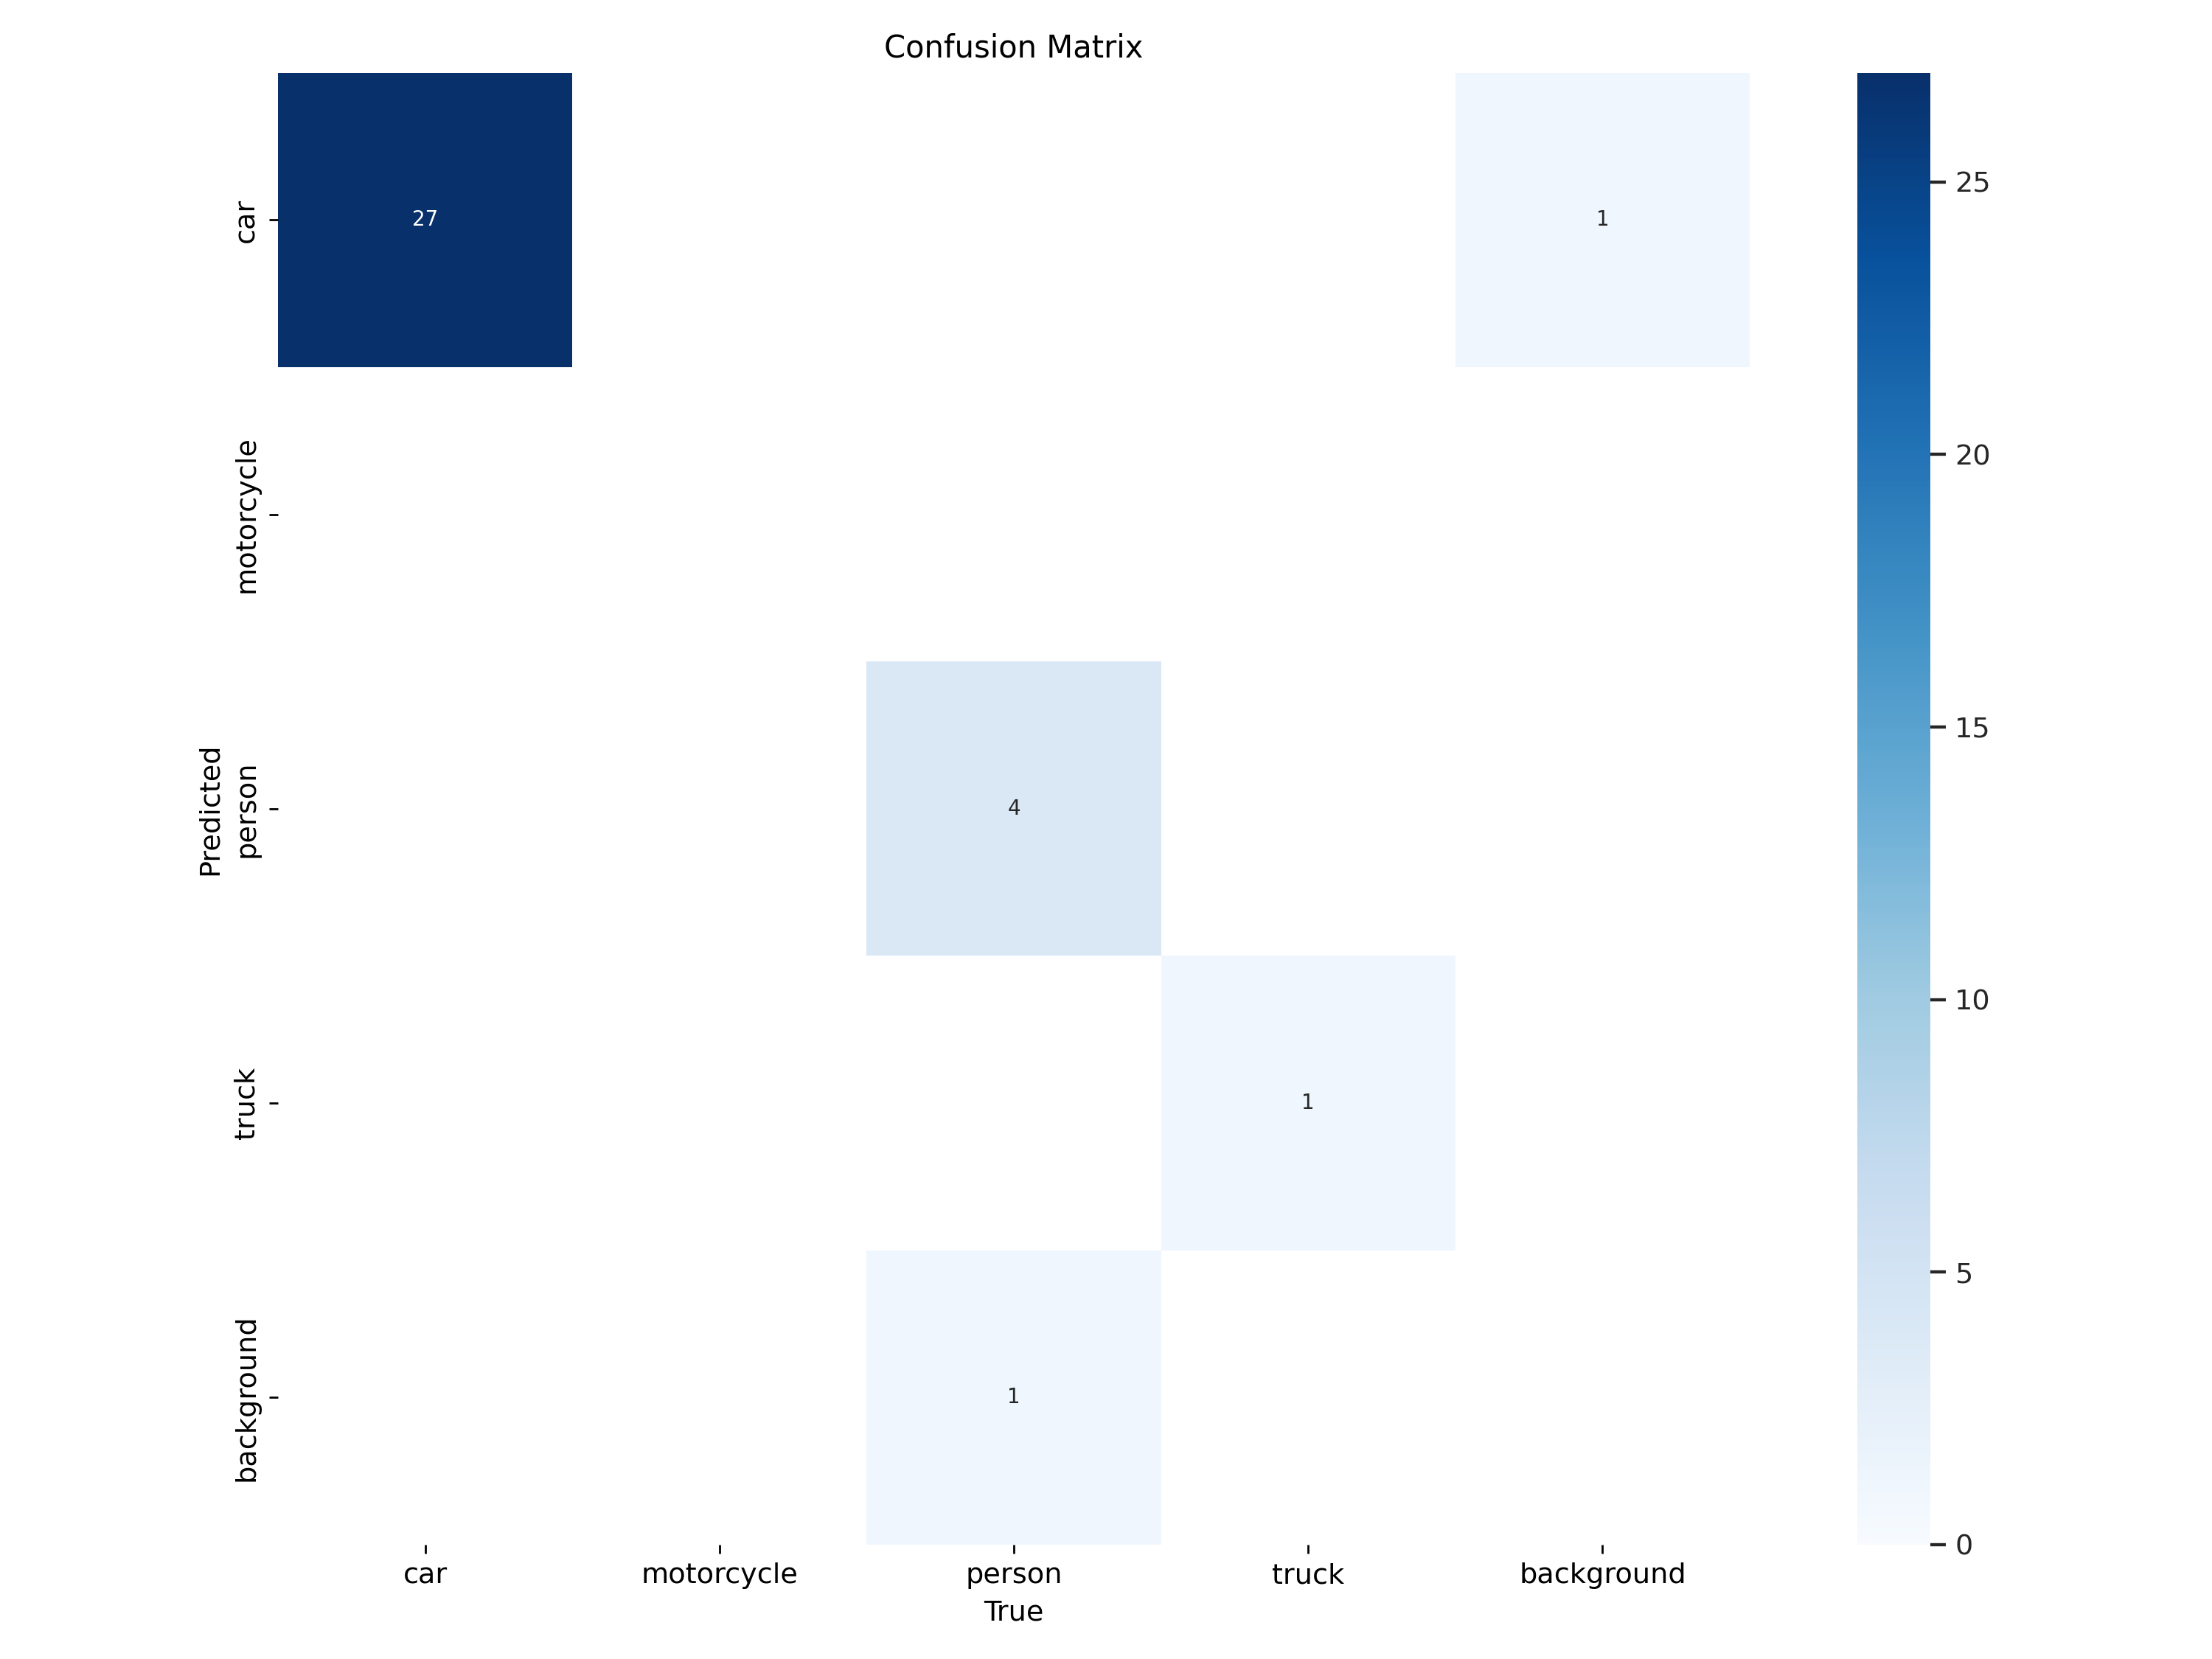

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=640)

/content


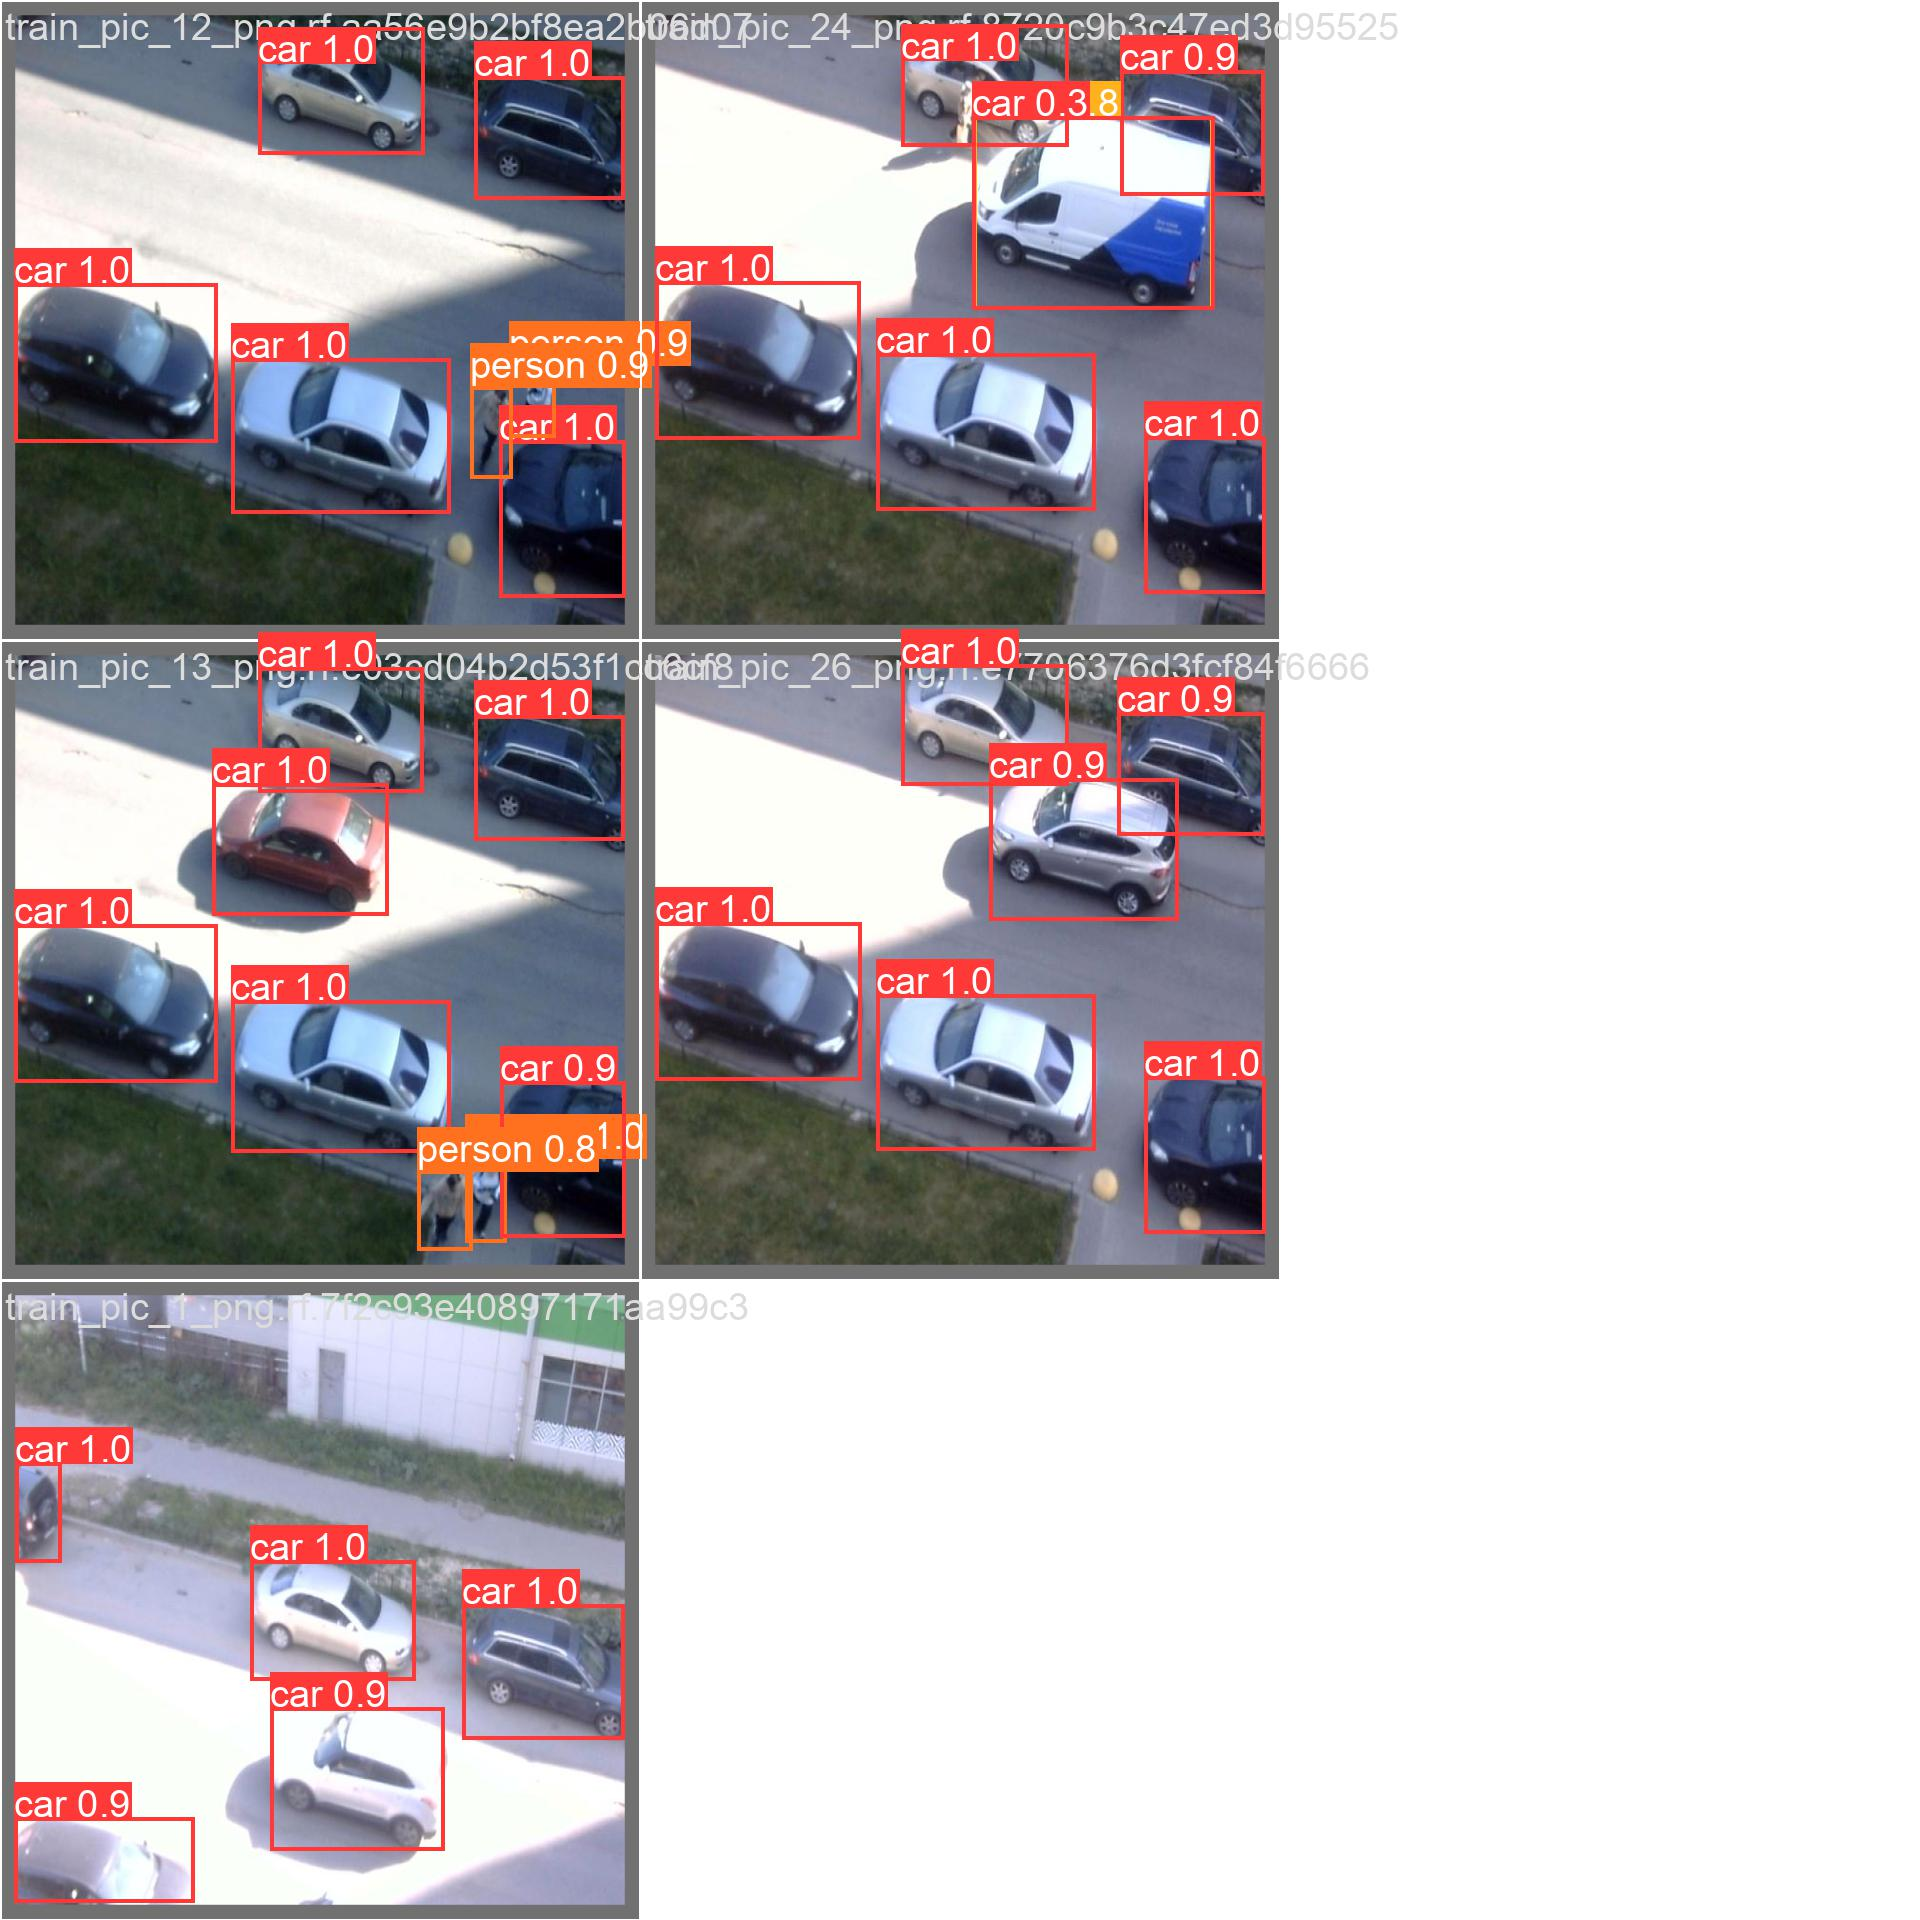

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=640, height=640)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/Vehicle-detection-1/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 28, len(boxes) = 33. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  3.41it/s]
                   all          5         33      0.984      0.936      0.995      0.827
                   car          5         27      0.991          1      0.995      0.869
                person          5          5          1      0.809      0.995      0.617
                 truck          5          1   

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/4 /content/Vehicle-detection-1/test/images/train_pic_10_png.rf.643435dafaff390d6e4cd8cd37e50b5f.jpg: 640x640 7 cars, 16.3ms
image 2/4 /content/Vehicle-detection-1/test/images/train_pic_11_png.rf.e473d44b5f6f0257be39971ea3ec9182.jpg: 640x640 9 cars, 1 person, 16.3ms
image 3/4 /content/Vehicle-detection-1/test/images/train_pic_27_png.rf.9bb12535e5f788a04dc9650863d4bf78.jpg: 640x640 6 cars, 16.3ms
image 4/4 /content/Vehicle-detection-1/test/images/train_pic_29_png.rf.73545b0bdb6f7255584aba1192f4e25d.jpg: 640x640 7 cars, 16.2ms
Speed: 1.7ms preprocess, 16.3ms inference, 22.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
